In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2d molecular model of random hard discs

Lets put in the two-dimensional space 20 hard discs (radius=1.0) following the only two rules:
- Every disc must be in contact with at least another disc.
- Discs are hard, they can not overlap.

In [2]:
radius = 1.0 
n_discs = 20

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random()
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center

Lets show now the figure of the resulting 2D random molecular model.

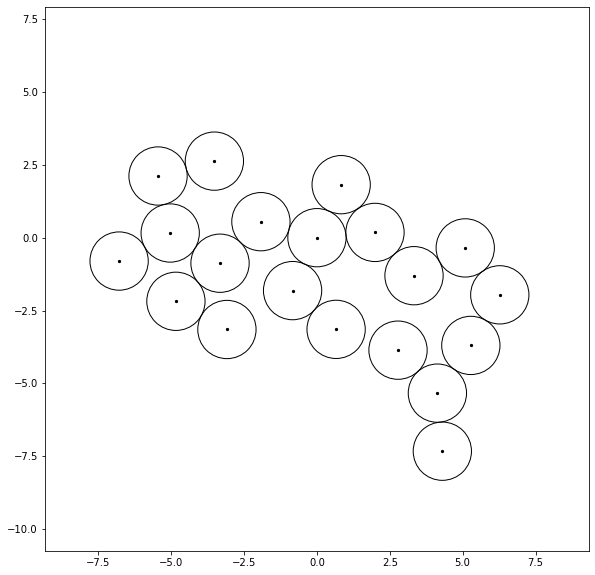

In [3]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Voronoi diagrams

Use the coordinates of our previous model, scipy and matplotlib.

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d

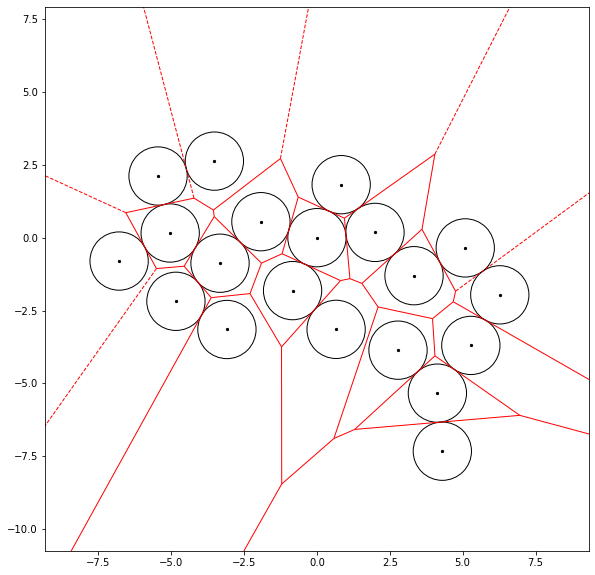

In [5]:
vor = Voronoi(positions, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

# Dellanuy triangulation

Use the coordinates of our previous model, scipy and matplotlib.

## Convex hull

Use the coordinates of our previous model, scipy and matplotlib.